In [5]:
import numpy as np
import sys
import math
import itertools
import matplotlib.pyplot as plt  
from time import time 

# _Backtracking_

## 4.1 Introducción

Se resuelve un problema avanzando paso a paso, construyendo soluciones parciales recursivamente e interrumpiendo un camino de recursión cuando la solución parcial infringe un requisito, el subárbol que se abre no resulta promisiorio o se han agotado el espacio de soluciones posibles.

En algunos casos, la noción de **solución parcial** no nos será tan útil, ya que no hay soluciones parciales, sino **estados**. Comenzaremos con un estado inicial y bus

Se aplica en problemas de:
 * **Decisión**  (saber si existe una solución satsiface un conjunto de _constraints_)
 * **Enumeración** (hallar todas las soluciones a un problema)
 * **Optimización** (no suele llevar a algoritmos veloces para este tipo de problemas)

A c/ paso construye una solución parcial y verifica su validez. Si ésta no satisface los requisitos (_constraints_), entonces el algoritmo vuelve sobre su paso (_backtracks_). Es decir, cuando el algoritmo debe decidir una alternativa entre varias posibles, no lo hace, simplemente evalua las alternativas viables recursivamente. 

Si el problema tiene _constraints_, entonces podrá realizar una **poda** del arbol de soluciones parciales y detener la exploración de este árbol cuando ya no pueda satisfacer estos requisitos.

Por recorrer buena parte del espacio de soluciones parciales válidas,
ésta técnica suele resultar en algoritmos con complejidades temporales elevadas (exponenciales, factoriales). Aun así encuentra utilidad en algunos casos. Por un lado es una forma sencilla de generar algún algoritmo para muchos problemas. Por otra parte, a la hora de satisfacer requisitos (_constraints_), un algoritmo generado por backtracking es preferible a explotar todo el espacio de soluciones parciales (válidas e inválidas), como haría un algoritmo de fuerza bruta.

Si bien no es necesario que estos algoritmos sean implementados con funciones recursivas, ésta es la forma más natural de implementarlos y generalmente los problemas a la hora de entender estos algoritmos, son problemas relacionados con las funciones recursivas.
Por eso, vamos a explorar una solución recursiva a un problema clásico, pero que no sigue la técnica de _backtracking_

-------------

## 4.2 Torre de Hanoi

Dados `N` discos de tamaños crecientes (siendo el disco 1 el más pequeño y el disco N el más grande), y 3 pilares, mover los `N` discos desde uno de los pilares hacia otro de los 2. Sólo se puede mover de a un disco a la vez y además un disco nunca puede estar apilado encima de un disco más pequeño.

Fé de erratas: en 1:45 llamé al disco **mediano** como _el más grande_.

--------------

## 4.3 Pseudocódigo de Torre de Hanoi

Este pseudocódigo y la siguiente imagen (extraída de Algorithms, de Jeff Erickson) representan lo que vimos en el video:

In [2]:
def torre_de_hanoi(n, fuente, destino, temporal):
    if n > 0
        torre_de_hanoi(n − 1, fuente, temporal, destino)
        muevo_disco(n, fuente, destino)
        torre_de_hanoi(n − 1, temporal, destino, fuente)
    return

SyntaxError: invalid syntax (1016434040.py, line 2)

<img src="hanoi.png" alt="mm" style="width: 1000px;"/>

La función del tiempo de ejecución se obtiene inmediatamente:

$$ T(n) = 2 T(n-1) + 1 $$

Más allá del segundo término constante, el árbol de recursión que esta fórmula implica es un árbol binario de altura $n$.
A cada nivel se duplicarán el número de hojas:

<img src="arbol_binario.png" alt="mm" style="width: 500px;"/>

No comprobaremos la complejidad de este álgoritmo, pero utilizando este método (el del árbol de recursión), vemos que este algoritmo, al explorar semejante árbol, tendrá una complejidad de $O(n) = 2^{n}$ 

Cómo encararía este problema un algoritmo de _backtracking_?

-------

## 4.4 Torre de Hanoi por backtracking

Notamos que en este problema satisfacer los requisitos es inmediato. Simplemente movemos de a 1 disco y nunca movemos un disco por encima de uno más grande.
Por otro lado, este problema requiere que el algoritmo tenga memoria de los estados ya explorados y no vuelva a visitarlos. Esto se convierte en un requisito adicional y a diferencia de los 2 requisitos anteriores, si puede desencadenar un evento de _backtrack_: si en alguna instancia, me encuentro que todos los movimientos que puedo hacer me llevan a estados ya visitados, no me quedará otra alternativa que volver sobre mis pasos hasta encontrar un movimiento posible que me lleve a un estado novedoso.

### Torre de Hanoi en backtracking

Lo siguiente es una posible implementación del algoritmo para resolver el problema de la torre de Hanoi en _backtracking_.

Noten que en `memoria` no elimino los estados que no conducen a la solución final, sino que ahí quedan registrados todos los estados que tuvo que visitar. 
Por eso imprimo mensajes en las líneas `18` y `23` de `hanoi_bt()` (`View > Show Line Numbers`), que son
los puntos en los que estoy seguro de estar en estados parciales que me pueden conducir a la solución final, sin repetir estados anteriores.

Recomiendo juntar **3** discos de distintos tamaños y reproducir, de abajo para arriba, los estados que llevaron a la solución final. Lo más probable es que haya movimientos innecesarios en este camino. Este algoritmo no se propone solucionar Torre de Hanoi con el menor número de movimientos posible, sino simplemente resolverlo.

Si nos planteáramos este nuevo objetivo entonces estaríamos ante un problema de optimización y en tal caso no quedaría más alternativa que probar todas las soluciones posibles desde el estado inicial hasta el final, algo particularmente engorroso en este problema ya que _backtracking_ no tiene una noción de progreso para este problema, y se puede alcanzar cualquier estado desde cualquier otro estado.

In [6]:
# A cada paso sólo se puede mover el disco 0 (el chico) y, opcionalmente, otro a determinar.
def siguiente_estado(estado, step):
    disco_a_mover = 0
    nuevo_pilar = estado[0]
    pilares = [0, 1, 2]
    pilares_libres = list(filter(lambda x: x != nuevo_pilar, pilares))
    
    # Hay 3 movimientos posibles:
    # step 1: mover `disco_a_mover` al pilar q no está ocupado por el 0
    # step 2: si sólo se puede mover el disco 0, moverlo al primer pilar libre
    # step 3: si sólo se puede mover el disco 0, moverlo al segundo pilar libre.
    nuevo_estado = np.copy(estado)
    if step == 1:
        # éste paso sólo tiene sentido cuando se pueda mover un disco más
        # grande q disco 0
        for disco in range(1, len(estado)):
            if estado[disco] != estado[0]:
                # Este es el disco más pequeño que no está por debajo del disco 0. Es el que se puede mover.
                disco_a_mover = disco
                break
        if disco_a_mover != 0:
            nuevo_pilar = list(filter(lambda x: x != estado[disco_a_mover], pilares_libres))[0]
    elif step == 2:
        nuevo_pilar = pilares_libres[0]
    elif step == 3:
        nuevo_pilar = pilares_libres[1]
        
    nuevo_estado[disco_a_mover] = nuevo_pilar
    return nuevo_estado

In [19]:
def ya_visitado(estado, memoria):
    for estado_anterior in memoria:
        if np.array_equal(estado_anterior, estado):
            return True
    return False

In [23]:
def hanoi_bt(estado, memoria, fin):
    step = 1
    while step < 4:
        nuevo_estado = siguiente_estado(estado, step)
        if ya_visitado(nuevo_estado, memoria):
            # `nuevo_estado` no es verdaderamente nuevo
            step += 1
            continue
        # Almaceno el estado en memoria.
        memoria = np.vstack((memoria, nuevo_estado))

        if np.array_equal(nuevo_estado, fin):
            print("#####  Éxito #####")
            print("del estado: ", estado)
            return True, memoria
        else:
            exito, memoria = hanoi_bt(nuevo_estado, memoria, fin)
            if exito:
                print("del estado: ", estado)
                return True, memoria
            
    print("backtrack!:   ", memoria[-1, :])
    return False, memoria

In [24]:
n = 3
estado = np.repeat(0, n)
fin = np.repeat(2, n)
# Le guardo 2 veces el estado inicial por una tecnicalidad, no es relevante.
memoria = np.vstack((estado, estado))

In [25]:
exito, estados = hanoi_bt(estado, memoria, fin)

backtrack!:    [2 0 1]
backtrack!:    [2 0 1]
backtrack!:    [2 0 1]
backtrack!:    [2 0 1]
backtrack!:    [2 2 0]
backtrack!:    [2 2 0]
backtrack!:    [2 2 0]
backtrack!:    [2 2 0]
backtrack!:    [2 2 0]
backtrack!:    [2 2 0]
backtrack!:    [2 1 2]
backtrack!:    [2 1 2]
backtrack!:    [2 1 2]
backtrack!:    [2 1 2]
#####  Éxito #####
del estado:  [1 2 2]
del estado:  [0 2 2]
del estado:  [0 1 2]
del estado:  [1 1 2]
del estado:  [1 1 0]
del estado:  [0 1 0]
del estado:  [0 2 0]
del estado:  [1 2 0]
del estado:  [1 0 0]
del estado:  [0 0 0]


Notar que la lista de estados visitados es más larga que la de estados que llevan a la solución final sin repetir estados anteriores. Esta diferencia se hace más grande cuanto más discos haya.

In [10]:
estados

array([[0, 0, 0],
       [0, 0, 0],
       [1, 0, 0],
       [1, 2, 0],
       [0, 2, 0],
       [0, 1, 0],
       [1, 1, 0],
       [1, 1, 2],
       [0, 1, 2],
       [0, 2, 2],
       [1, 2, 2],
       [1, 0, 2],
       [0, 0, 2],
       [0, 0, 1],
       [1, 0, 1],
       [1, 2, 1],
       [0, 2, 1],
       [0, 1, 1],
       [1, 1, 1],
       [2, 1, 1],
       [2, 0, 1],
       [2, 2, 1],
       [2, 2, 0],
       [2, 0, 2],
       [2, 1, 2],
       [2, 2, 2]])

----------

## 4.5 Reinas en un tablero

Acabamos de ver un problema en el que si no tenemos memoria de los estados visitados, nuestro algoritmo no terminaría nunca. Veamos ahora un problema en el que sí hay una noción de progreso, por lo que no es necesario tener memoria de soluciones parciales anteriores. Eso si, en este problema es muy fácil construir soluciones parciales que sean erróneas y cuyo error no será evidente hasta que los requisitos sean violados.

Se deben colocar `n` reinas en un tablero de `nxn` sin que estas se ataquen mutuamente. Veamos una solución ejemplo para un tablero de `4x4`:

<img src="queens.png" alt="mm" style="width: 500px;"/>

El algoritmo de backtracking que resuelve este problema lo hace construyendo soluciones parciales. Coloca, recursivamente, de a 1 reina en el tablero, cuidando que no se viole el requisito (es decir, que no se ataquen entre ellas). Si la reina a colocar en la instancia actual, no tiene celda válida posible, entonces es evidente que hemos explorado un camino inválido. Entonces, volvemos 1 paso y le buscamos un nuevo lugar a la reina que colocamos en la instancia inmediatamente anterior. Esta mecánica se repita hasta hallar una solución válida.

El algoritmo que veremos, tiene una inteligencia: sabe que necesariamente habrá una reina por fila y por columna, por lo que a la hora de colocar cada reina, no explora todas las celdas vacías del tablero, sino sólamente las celdas de la siguiente fila o columna.

Veamos el árbol que recorre el algoritmo para hallar una de las 2 soluciones anteriores:

<img src="nqueens_tree.png" alt="mm" style="width: 800px;"/>

La complejidad del algoritmo de _backtrack_ es de $O(2^{n})$, lo cual es una mejora respecto de la complejidad del algoritmo bruto: $O(n!)$

-------------------

## 4.6 Implementación de Reinas en un tablero

Desde la Unidad 2, D&C, venimos diciendo que un algoritmo implementado con una función recursiva puede ser perfectamente implementado por una función simple. Aprovecharemos esta oportunidad para remarcar la diferencia entre un algoritmo y su implementación. El algoritmo de `nqueens` es recursivo, pero eso no quiere decir que su implementación consista en una función recursiva.

Claro, como verán, esto tiene un costo. Si bien la implementación de este algoritmo con una función recursiva es muy simple, al escribir una función no recursiva debemos implementar la lógica del stack dentro de nuestro código y esto implica un mayor número de líneas.

In [29]:
def counter(a, k, n, u_0):
    for u in np.arange(u_0, n + 1, 1):
        count = 0
        for j in range(k):
            if ((u != a[j]) and (np.abs(u - a[j]) != (k - j))):
                count += 1
            else:
                break
        if count == k:
            return u
    return 0

def nqueens(n_max):
    tiempo = []
    for n in range(n_max + 1):
        a = np.zeros([1, n+1])[0]
        iteration = 1
        sol_list = 0
        flag = 0
        u_0 = 1
        k = 0
        t_1 = time()
        while not flag:
            exit = 0
            while not exit:
                a[k] = counter(a, k, n, u_0)
                u_0 = 1
                if a[k] == 0:
                    k -= 1
                    if k == -1:
                        flag = 1
                        exit = 1
                    u_0 = a[k] + 1
                    a[k] = 0
                    k -= 1
                k += 1
                if k == n:
                    sol_list += 1
                    #print(f'---> SOLUTION NUMBER {sol_list} = {a}')
                    exit = 1
            iteration += 1
        t_tot = time() - t_1
        tiempo.append(t_tot)
        print(f"Número de soluciones para {n} reinas: {sol_list}. Tiempo = {t_tot} segs.")
    return tiempo

No vamos a revisar esta función línea por línea, pero si aprovechemos para ver el tiempo que consume hallar todas las soluciones para los problemas de `nqueens` de todos los tamaños, desde `0`, hasta `nmax`.

Cabe aclarar que esto no es un μbenchmark, sino que es apenas una primera exploración del tiempo de corrida.

In [31]:
tiempo = nqueens(12)

Número de soluciones para 0 reinas: 0. Tiempo = 2.765655517578125e-05 segs.
Número de soluciones para 1 reinas: 1. Tiempo = 3.1948089599609375e-05 segs.
Número de soluciones para 2 reinas: 0. Tiempo = 5.0067901611328125e-05 segs.
Número de soluciones para 3 reinas: 0. Tiempo = 0.00011730194091796875 segs.
Número de soluciones para 4 reinas: 2. Tiempo = 0.00047135353088378906 segs.
Número de soluciones para 5 reinas: 10. Tiempo = 0.002165079116821289 segs.
Número de soluciones para 6 reinas: 4. Tiempo = 0.006972789764404297 segs.
Número de soluciones para 7 reinas: 40. Tiempo = 0.030506134033203125 segs.
Número de soluciones para 8 reinas: 92. Tiempo = 0.09883809089660645 segs.
Número de soluciones para 9 reinas: 352. Tiempo = 0.4206571578979492 segs.
Número de soluciones para 10 reinas: 724. Tiempo = 1.6146636009216309 segs.
Número de soluciones para 11 reinas: 2680. Tiempo = 8.801789045333862 segs.
Número de soluciones para 12 reinas: 14200. Tiempo = 53.6846022605896 segs.


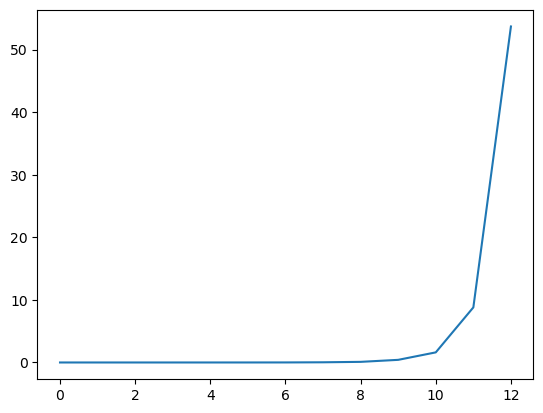

In [32]:
plt.plot(tiempo)
plt.show()

----------------

## 4.7 Conclusión

* Completar la práctica
* Leer de Algorithms ; Chapter 2 Backtracking: **p(71-93)**

--------------------

### Contenidos a explicar durante la práctica

1.